$$
\text{Hyperplane equation:}
$$
$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$
$$
\text{Margin maximization:}
$$
$$
\text{Minimize } \frac{1}{2}\|\mathbf{w}\|^2 \text{ s.t. } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
$$


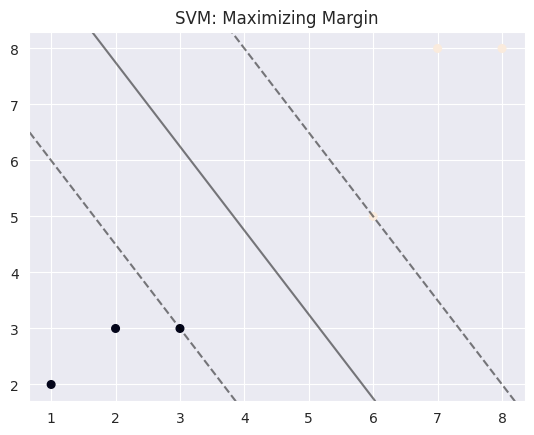

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from HOML_book_ex.ex2 import housing

# Linearly separable data
X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train SVM
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to plot decision boundary
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.title("SVM: Maximizing Margin")
plt.show()

$$
\text{Logistic Regression}
$$
$$
\text{Sigmoid function:}
$$
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
$$
\text{Decision boundary:}
$$
$$
z = \beta_0 + \beta_1x_1 + \cdots + \beta_nx_n = 0
$$

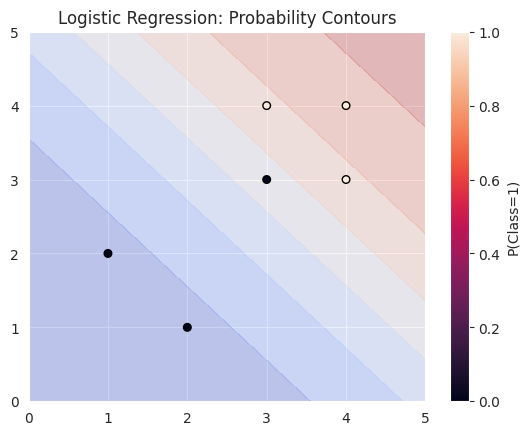

In [3]:
from sklearn.linear_model import LogisticRegression

# Overlapping classes
X = np.array([[1, 2], [2, 1], [3, 3], [4, 4], [3, 4], [4, 3]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train Logistic Regression
clf = LogisticRegression()
clf.fit(X, y)

# Plot probabilities
xx, yy = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
plt.title("Logistic Regression: Probability Contours")
plt.colorbar(label='P(Class=1)')
plt.show()

$$
\text{Naive Bayes}
$$
$$
\text{Class probability:}
$$
$$
P(y|x_1, ..., x_n) \propto P(y) \prod_{i=1}^n P(x_i|y)
$$
$$
\text{Gaussian assumption:}
$$
$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$$

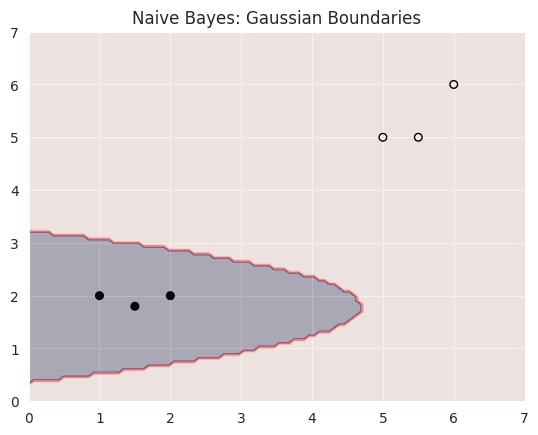

In [4]:
from sklearn.naive_bayes import GaussianNB

# Gaussian clusters
X = np.array([[1, 2], [1.5, 1.8], [2, 2], [5, 5], [5.5, 5], [6, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train Naive Bayes
clf = GaussianNB()
clf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(0, 7, 100), np.linspace(0, 7, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
plt.title("Naive Bayes: Gaussian Boundaries")
plt.show()

$$
\text{KNN}
$$
$$
\text{Classification rule:}
$$
$$
\hat{y} = \text{mode}(\{y_i | i \in \mathcal{N}_k(\mathbf{x})\})
$$
$$
\text{Distance metric (Euclidean):}
$$
$$
d(\mathbf{x}, \mathbf{x}') = \sqrt{\sum_{i=1}^n (x_i - x'_i)^2}
$$

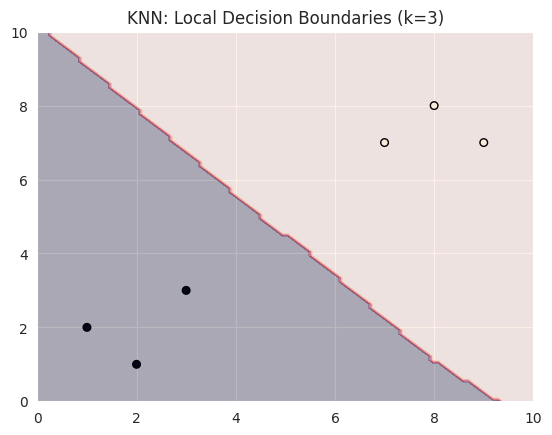

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Clustered data
X = np.array([[1, 2], [2, 1], [3, 3], [7, 7], [8, 8], [9, 7]])
y = np.array([0, 0, 0, 1, 1, 1])

# Train KNN (k=3)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
plt.title("KNN: Local Decision Boundaries (k=3)")
plt.show()


$$
\text{Gradient Descent Equations}
$$
$$
\mathbf{\theta}^{(t+1)} = \mathbf{\theta}^{(t)} - \eta \nabla_{\mathbf{\theta}} J(\mathbf{\theta}^{(t)})
$$

$$
\theta_j^{(t+1)} = \theta_j^{(t)} - \eta \frac{\partial J(\mathbf{\theta})}{\partial \theta_j} \bigg|_{\mathbf{\theta} = \mathbf{\theta}^{(t)}}
$$
$$
\text{Model parameters at iteration } t: \mathbf{\theta}^{(t)}
$$
$$
\text{Learning rate (step size): } \eta
$$
$$
\text{Gradient of the cost function } J \text{ w.r.t. } \theta: \nabla_{\theta} J
$$
$$
\text{Partial derivative of } J \text{ w.r.t. parameter } \theta_j: \frac{\partial J}{\partial \theta_j}
$$
$$
\text{Gradient descent minimizes the loss } J(\theta) \text{ by iteratively moving parameters } \theta \text{ in the **direction of steepest descent** (negative gradient).}
$$
$$
\text{Smaller } \eta: \text{ Slow but stable convergence.}
$$
$$
\text{Larger } \eta: \text{ Faster but risk of overshooting minima.}
$$

$$
\text{Linear Regression}
$$
$$
\hat y_i - \text{predicted value}
$$
$$
\text{Model: } \hat{y} = \theta_0 + \theta_1x_1 + \cdots + \theta_nx_n
$$
$$
\text{Residual/Error}
$$
$$
\sum_{i=1}^m |{y}_i - \hat y_i|^2
$$
$$
\text{Mean Absolute Error (MAE)} - \text{How much on average the predictions are off}
$$
$$
\frac{1}{m} \sum_{i=1}^m |{y}_i - \hat y_i|
$$
$$
\text{Mean Squared Error (MSE)} - \text{How much the predictions are off on average, squared instead of absolute}
$$
$$
\text{Predictions are off by squared value, like if we were predicting prices in Euro now we are off by } {Euro}^2
$$
$$
\frac{1}{m} \sum_{i=1}^m ({y}_i - \hat y_i)^2
$$
$$
\text{Root Mean Squared Error (RMSE)} - \text{Square root of MSE}
$$
$$
\sqrt{\frac{1}{m} \sum_{i=1}^m ({y}_i - \hat y_i)^2}
$$
$$
R^2 \text{ Coefficient of Determination}
$$
$$
\text{RSS sum of squared residuals, TSS total sum of squares - how far of are the values from the mean}
$$
$$
R^2 = 1 - \frac{RSS}{TSS}
$$
$$
\text{RSS} = \sum_{i=1}^m (y_i - \hat y_i)^2
$$
$$
\text{TSS} = \sum_{i=1}^m (y_i - \bar y)^2
$$
$$
1 - \frac{\sum_{i=1}^m (y_i - \hat y_i)^2}{\sum_{i=1}^m (y_i - \bar y)^2}
$$

$$
\text{Search for correlation between features and target variable, and between features themselves.}
$$
$$
\text{Maybe change some features to make them more relevant, for example dividing weight by height to get BMI.}
$$


In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


$$
\text{Better Evaluation Using Cross-Validation}
$$

In [ ]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)



$$
\text{Use pipelines to automate the process of transforming data.}
$$

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

$$
\text{Fine-Tune Your Model}
$$

$$
\text{Grid Search}
$$

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

$$
\text{Randomized Search}
$$

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

$$
\text{
Analyze the Best Models and Their Errors}
$$

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

$$
\text{and more...}
$$
https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb



    Tips on Creating Features
    It's good to keep in mind your model's own strengths and weaknesses when creating features. Here are some guidelines:

        Linear models learn sums and differences naturally, but can't learn anything more complex.
        Ratios seem to be difficult for most models to learn. Ratio combinations often lead to some easy performance gains.
        Linear models and neural nets generally do better with normalized features. Neural nets especially need features scaled to values not too far from 0. Tree-based models (like random forests and XGBoost) can sometimes benefit from normalization, but usually much less so.
        Tree models can learn to approximate almost any combination of features, but when a combination is especially important they can still benefit from having it explicitly created, especially when data is limited.
        Counts are especially helpful for tree models, since these models don't have a natural way of aggregating information across many features at once.



     PCA Best Practices
    There are a few things to keep in mind when applying PCA:

        PCA only works with numeric features, like continuous quantities or counts.
        PCA is sensitive to scale. It's good practice to standardize your data before applying PCA, unless you know you have good reason not to.
        Consider removing or constraining outliers, since they can have an undue influence on the results.



     Use Cases for Target Encoding
    Target encoding is great for:

        High-cardinality features: A feature with a large number of categories can be troublesome to encode: a one-hot encoding would generate too many features and alternatives, like a label encoding, might not be appropriate for that feature. A target encoding derives numbers for the categories using the feature's most important property: its relationship with the target.
        Domain-motivated features: From prior experience, you might suspect that a categorical feature should be important even if it scored poorly with a feature metric. A target encoding can help reveal a feature's true informativeness.



https://www.kaggle.com/code/ryanholbrook/feature-engineering-for-house-prices#Step-4---Hyperparameter-Tuning